In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [7]:
# Read the npy file 
FD_Curves = np.load("SOO_results\DP1000_room_Swift_NDBR50_curve2_test\initial\common\FD_Curves.npy", allow_pickle=True).tolist()

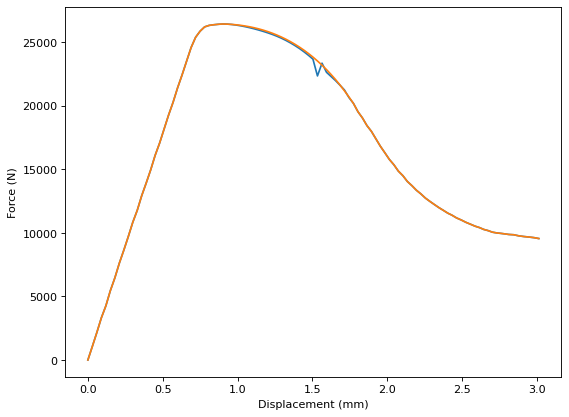

In [29]:
force = list(FD_Curves.values())[3]['force']
displacement = list(FD_Curves.values())[3]['displacement']
# plot
figure(figsize=(8, 6), dpi=80)
plt.plot(displacement, force, label='FD curve')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
#print(list(FD_Curves.values())[5]['force'])

# Apply the Savitzky-Golay Filter to smoothen the force-displacement curve on displacement range [1.2, 1.6]
# Apply the filter 10 times to get a smoother curve
import copy
from scipy.signal import savgol_filter
start = 30
end = 60
smooth_force = copy.deepcopy(force)
for i in range(20000):
    smooth_force = savgol_filter(smooth_force[start:end], 
                                window_length=5, 
                                polyorder=3,
                                #deriv=0,
                                #delta=1
                                )
    smooth_force = np.concatenate((force[0:start], smooth_force, force[end:]))
plt.plot(displacement, smooth_force, label='Smoothed FD curve')